In [10]:
import pandas as pd
import numpy as np
ifood=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\indian_food.csv')
ifood.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [11]:

print("shape :{}\ncoldtype:\n{}".format(ifood.shape,ifood.dtypes))
#print("coldtype:\n{}".format(ifood.dtypes))

shape :(255, 9)
coldtype:
name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object


In [12]:
ifood.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [13]:
ifood[ifood['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [14]:
ifood.replace("-1",np.nan,inplace=True)
ifood.isnull().sum()

name               0
ingredients        0
diet               0
prep_time          0
cook_time          0
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [15]:
ifood.nunique()

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      4
course              4
state              24
region              6
dtype: int64

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
df1=ifood.groupby('state').size().to_frame('count').reset_index()
df1

,state,count
0,Andhra Pradesh,10
1,Assam,21
2,Bihar,3
3,Chhattisgarh,1
4,Goa,3
5,Gujarat,35
6,Haryana,1
7,Jammu & Kashmir,2
8,Karnataka,6
9,Kerala,8


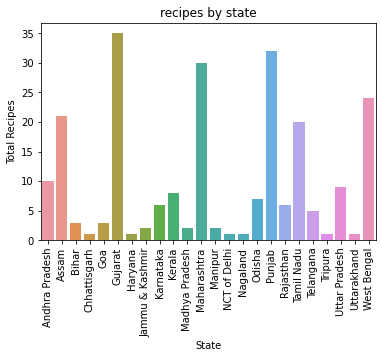

In [17]:
sns.barplot(y='count',x='state',data=df1).set_title('recipes by state')
plt.xticks(rotation='90')
plt.xlabel('State')
plt.ylabel('Total Recipes')
plt.show()


In [18]:
ifood.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [19]:
data1= ifood.groupby(ifood['diet']).size().to_frame('total').reset_index()
data1

,diet,total
0,non vegetarian,29
1,vegetarian,226


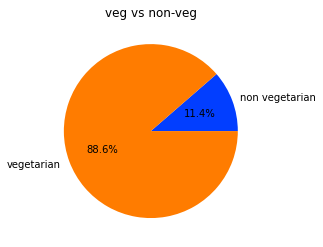

In [20]:
colours=sns.color_palette('bright')[0:5]
plt.pie(data1.total,labels=data1.diet,colors=colours,autopct='%1.1f%%')
plt.title('veg vs non-veg')
plt.show()

In [21]:
data2= ifood.groupby(ifood['course']).size().to_frame('total').reset_index()
data2

,course,total
0,dessert,85
1,main course,129
2,snack,39
3,starter,2


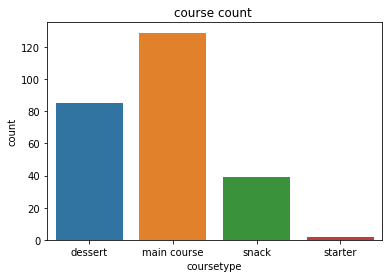

In [22]:
sns.barplot(x='course',y='total',data=data2).set_title('course count ')
#plt.xticks(rotation='90')
plt.xlabel('coursetype')
plt.ylabel('count')
plt.show()

In [23]:
ifood.groupby(ifood['course']).count()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,state,region
course,,,,,,,,
dessert,85,85,85,85,85,85,79,79
main course,129,129,129,129,129,103,120,125
snack,39,39,39,39,39,36,30,35
starter,2,2,2,2,2,2,2,2


In [24]:
#analysing the amount of time needed for making cuisines
data3=( ifood.prep_time + ifood.cook_time).to_frame('totaltime')
data3

,totaltime
0,70
1,110
2,75
3,45
4,55
...,...
250,35
251,80
252,-2
253,65


<AxesSubplot:xlabel='totaltime', ylabel='Count'>

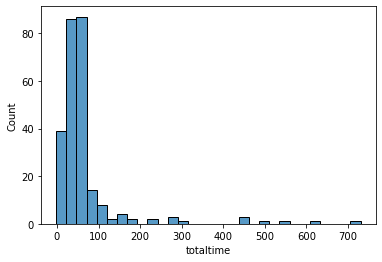

In [25]:
sns.histplot(data=data3,x='totaltime' ,bins=30)


In [26]:
df_temp = ifood
df_temp['total_time'] = ifood.prep_time + ifood.cook_time
df_temp.sort_values('total_time',ascending = False).head()[['name','course','total_time']]

,name,course,total_time
62,Shrikhand,dessert,730
114,Pindi chana,main course,620
155,Puttu,main course,535
29,Misti doi,dessert,510
128,Dosa,snack,450


In [27]:
food_raj=ifood[ifood['state']=='Rajasthan'][['name','ingredients']]
food_raj

,name,ingredients
1,Boondi,"Gram flour, ghee, sugar"
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su..."
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,..."
113,Pattor,"Arbi ke patte, sesame seeds, gur, bengal gram ..."
183,Gatta curry,"Yogurt, besan, sauce, garam masala powder, gra..."
219,Churma Ladoo,"Whole wheat flour, khus khus, sesame seeds, dr..."


In [28]:
def total_ing(column):
    return len(column.split(','))

food_raj['ing_count']=food_raj['ingredients'].apply(total_ing)
food_raj

,name,ingredients,ing_count
1,Boondi,"Gram flour, ghee, sugar",3
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",10
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",5
113,Pattor,"Arbi ke patte, sesame seeds, gur, bengal gram ...",5
183,Gatta curry,"Yogurt, besan, sauce, garam masala powder, gra...",5
219,Churma Ladoo,"Whole wheat flour, khus khus, sesame seeds, dr...",5


In [44]:
food_raj.sort_values('ing_count',ascending=False)

,name,ingredients,ing_count
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",10
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",5
113,Pattor,"Arbi ke patte, sesame seeds, gur, bengal gram ...",5
183,Gatta curry,"Yogurt, besan, sauce, garam masala powder, gra...",5
219,Churma Ladoo,"Whole wheat flour, khus khus, sesame seeds, dr...",5
1,Boondi,"Gram flour, ghee, sugar",3


In [45]:
df_temp[(df_temp['diet'] == 'vegetarian') & (df_temp['course'] == 'main course')].sort_values("total_time", ascending= False).head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North,620
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,NaN,main course,Kerala,South,535
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South,240
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120,60,NaN,main course,Karnataka,South,180
158,Sevai,"Sevai, parboiled rice, steamer",vegetarian,120,30,NaN,main course,NaN,South,150


In [46]:
df_temp[(df_temp['diet'] == 'non vegetarian') & (df_temp['course'] == 'main course')].sort_values("total_time", ascending= False).head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South,150
137,Beef Fry,"Beef, coconut, garam masala, curry leaves, gre...",non vegetarian,10,60,spicy,main course,Kerala,South,70
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,65
235,Haq Maas,"Lamb, garam masala powder, curd, turmeric, bay...",non vegetarian,20,40,spicy,main course,Assam,North East,60
